<a href="https://colab.research.google.com/github/Falcon4fan/Falcon4fan/blob/main/FakeNewsClassifier_TFIDF_18_Aug_(c).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fake News Classifier
Dataset:  https://www.kaggle.com/c/fake-news/data#

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir_path='/content/drive/My Drive/Machine Learning project/Fake-News-Classifier-master/'

In [ ]:
df=pd.read_csv(data_dir_path+'train.csv') #Distinguishes between real and fake news. '0' for real,'1' for fake
df.head()

In [ ]:
df['label'].value_counts() #Counts the number of real and fake news

1    10413
0    10387
Name: label, dtype: int64

In [ ]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
X=df.drop("label",axis=1)

In [ ]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
y = df["label"]

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
df.shape

(20800, 5)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [ ]:
df=df.dropna()

In [ ]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
messages = df.copy()

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
messages['text'][6]

'PARIS  —   France chose an idealistic, traditional   candidate in Sunday’s primary to represent the Socialist and   parties in the presidential election this spring. The candidate, Benoît Hamon, 49, who ran on the slogan that he would “make France’s heart beat,” bested Manuel Valls, the former prime minister, whose campaign has promoted more   policies and who has a strong    background. Mr. Hamon appeared to have won by a wide margin, with incomplete returns showing him with an estimated 58 percent of the vote to Mr. Valls’s 41 percent. “Tonight the left holds its head up high again it is looking to the future,” Mr. Hamon said, addressing his supporters. “Our country needs the left, but a modern, innovative left,” he said. Mr. Hamon’s victory was the clearest sign yet that voters on the left want a break with the policies of President François Hollande, who in December announced that he would not seek  . However, Mr. Hamon’s strong showing is unlikely to change widespread assessments

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
print(stopwords)

{'other', 'but', "don't", 'once', 'again', 'mightn', "won't", "couldn't", 'then', "you're", 'weren', 'why', 'isn', "aren't", 'our', 'haven', 'didn', 'as', 'should', 'few', 'have', 'that', 'himself', 'they', "you've", 'yourselves', 'm', 'o', 's', 'ourselves', 'up', 'she', 'and', 'how', 'not', 'i', "weren't", 'ours', 'by', 'from', 'off', 'what', 'very', 'or', 'myself', 'in', 'you', 't', 'these', 'about', 'here', 'its', 'has', 'are', 'your', 'it', 'whom', 'me', 'don', 'on', 'hers', 'own', 'wouldn', 'against', "isn't", 'a', 'which', 'now', 'itself', 're', 'if', 'when', 'more', 'an', "hasn't", 'he', "shan't", 'couldn', 'through', 'with', 'so', 'only', 'above', 'yours', "wasn't", 'needn', 'there', 'such', 'y', 'can', "haven't", 'who', "needn't", "you'll", 'further', 'the', 'all', 'theirs', 'under', 'too', 'shouldn', "hadn't", 'his', 'was', 'him', 'at', "doesn't", 'were', 'we', 'aren', 'because', 'any', 'will', 'd', "didn't", 'into', 'while', 'between', "mustn't", 'than', 'having', 'had', 'do

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
#print (len(messages)) 
for i in range(0, len(messages)):
  #print(i)
  review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
  review = review.lower()
  review = review.split()  

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)
#print("the end")

In [ ]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [ ]:
cv = TfidfVectorizer(min_df=1,stop_words='english')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdif_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tdif_v.fit_transform(corpus).toarray()

In [ ]:
print(len(tdif_v.vocabulary_))

5000


In [ ]:
print(tdif_v.vocabulary_)

{'hous': 2049, 'dem': 1103, 'aid': 89, 'even': 1453, 'see': 3868, 'comey': 820, 'letter': 2457, 'jason': 2241, 'chaffetz': 645, 'tweet': 4613, 'comey letter': 822, 'jason chaffetz': 2242, 'flynn': 1665, 'hillari': 1985, 'clinton': 751, 'big': 396, 'woman': 4916, 'campu': 574, 'breitbart': 489, 'hillari clinton': 1987, 'campu breitbart': 575, 'truth': 4598, 'might': 2698, 'get': 1789, 'fire': 1627, 'civilian': 734, 'kill': 2334, 'singl': 3982, 'us': 4671, 'airstrik': 98, 'identifi': 2086, 'us airstrik': 4672, 'iranian': 2196, 'jail': 2230, 'fiction': 1596, 'stori': 4167, 'stone': 4164, 'death': 1064, 'jacki': 2228, 'mason': 2611, 'hollywood': 2020, 'would': 4945, 'love': 2534, 'trump': 4503, 'bomb': 451, 'north': 2949, 'korea': 2359, 'lack': 2378, 'tran': 4459, 'bathroom': 340, 'exclus': 1472, 'video': 4720, 'north korea': 2952, 'win': 4894, 'french': 1726, 'socialist': 4033, 'parti': 3138, 'presidenti': 3366, 'nomin': 2945, 'new': 2883, 'york': 4979, 'time': 4398, 'new york': 2908, 'yo

In [ ]:
tdif_v.vocabulary_

{'hous': 2049,
 'dem': 1103,
 'aid': 89,
 'even': 1453,
 'see': 3868,
 'comey': 820,
 'letter': 2457,
 'jason': 2241,
 'chaffetz': 645,
 'tweet': 4613,
 'comey letter': 822,
 'jason chaffetz': 2242,
 'flynn': 1665,
 'hillari': 1985,
 'clinton': 751,
 'big': 396,
 'woman': 4916,
 'campu': 574,
 'breitbart': 489,
 'hillari clinton': 1987,
 'campu breitbart': 575,
 'truth': 4598,
 'might': 2698,
 'get': 1789,
 'fire': 1627,
 'civilian': 734,
 'kill': 2334,
 'singl': 3982,
 'us': 4671,
 'airstrik': 98,
 'identifi': 2086,
 'us airstrik': 4672,
 'iranian': 2196,
 'jail': 2230,
 'fiction': 1596,
 'stori': 4167,
 'stone': 4164,
 'death': 1064,
 'jacki': 2228,
 'mason': 2611,
 'hollywood': 2020,
 'would': 4945,
 'love': 2534,
 'trump': 4503,
 'bomb': 451,
 'north': 2949,
 'korea': 2359,
 'lack': 2378,
 'tran': 4459,
 'bathroom': 340,
 'exclus': 1472,
 'video': 4720,
 'north korea': 2952,
 'win': 4894,
 'french': 1726,
 'socialist': 4033,
 'parti': 3138,
 'presidenti': 3366,
 'nomin': 2945,
 'ne

In [ ]:
X.shape

(18285, 5000)

In [ ]:
y=messages['label']

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
print('\n The Train Test split:')
print('\n The total number of training data:', y_train.shape)
print('\n The total number of test data:', y_test.shape)


 The Train Test split:

 The total number of training data: (12250,)

 The total number of test data: (6035,)


In [ ]:
tdif_v.get_feature_names()[:20]
#tdif_v.get_feature_names()

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [ ]:
tdif_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
response=tdif_v.fit_transform(corpus)

In [ ]:
print(response)

  (0, 2242)	0.36175619969572115
  (0, 822)	0.3525142247639078
  (0, 4613)	0.2756316108954151
  (0, 645)	0.36175619969572115
  (0, 2241)	0.3330480034289525
  (0, 2457)	0.28344252388598795
  (0, 820)	0.2382024172879123
  (0, 3868)	0.2469234146286464
  (0, 1453)	0.22229232782736658
  (0, 89)	0.26060109150311705
  (0, 1103)	0.2592720842477314
  (0, 2049)	0.210961649537268
  (1, 575)	0.4871986337008045
  (1, 1987)	0.2615395546404966
  (1, 489)	0.17240445582240285
  (1, 574)	0.42508152499678137
  (1, 4916)	0.33980663635579444
  (1, 396)	0.32965261120816036
  (1, 751)	0.21557241894774798
  (1, 1985)	0.21465302586158383
  (1, 1665)	0.40881556952640297
  (2, 1627)	0.45873323146767525
  (2, 1789)	0.4139302340102076
  (2, 2698)	0.5864178539930746
  (2, 4598)	0.5237744593216016
  :	:
  (18281, 3815)	0.5469147380017422
  (18281, 3259)	0.5469147380017422
  (18281, 2912)	0.13189707228319214
  (18281, 4984)	0.13189707228319214
  (18281, 2908)	0.13163239427068435
  (18281, 4398)	0.13018614035171014
  (

In [ ]:
feature_names=tdif_v.get_feature_names()
for col in response.nonzero()[1]:
    print (feature_names[col], '  -  ' , response[0,col])

Streaming output truncated to the last 5000 lines.
use   -   0.0
comment   -   0.0
food   -   0.0
break   -   0.0
mean   -   0.0
collect   -   0.0
system   -   0.0
corrupt   -   0.0
perfect   -   0.0
hillari   -   0.0
vitamin   -   0.0
skin   -   0.0
problem   -   0.0
take   -   0.0
switch   -   0.0
earth   -   0.0
collaps   -   0.0
field   -   0.0
planet   -   0.0
within   -   0.0
stephen   -   0.0
popul   -   0.0
surviv   -   0.0
anoth   -   0.0
year   -   0.0
hawk   -   0.0
breitbart   -   0.0
penguin   -   0.0
hous new york   -   0.0
hous new   -   0.0
make   -   0.0
book   -   0.0
deal   -   0.0
obama   -   0.0
new york time   -   0.0
york time   -   0.0
new york   -   0.0
time   -   0.0
york   -   0.0
new   -   0.0
hous   -   0.210961649537268
evil   -   0.0
trump   -   0.0
sweep   -   0.0
roar   -   0.0
storm   -   0.0
south   -   0.0
new york time   -   0.0
york time   -   0.0
new york   -   0.0
time   -   0.0
york   -   0.0
new   -   0.0
desert   -   0.0
await   -   0.0
look  

In [ ]:
count_df=pd.DataFrame(X_train,columns=tdif_v.get_feature_names())

In [ ]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.432575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449417,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.15264,0.0,0.0,0.0,0.0,0.152971,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
############ THE END ##################



### MultinomialNB Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.881
Confusion matrix, without normalization


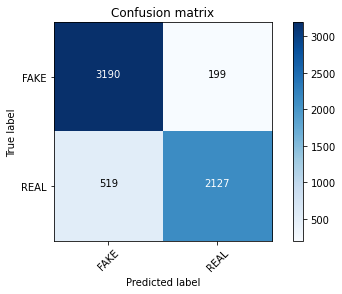

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8810273405136703

In [ ]:
print('\n Classification Report is:\n',metrics.classification_report(y_test,pred))


 Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      3389
           1       0.91      0.80      0.86      2646

    accuracy                           0.88      6035
   macro avg       0.89      0.87      0.88      6035
weighted avg       0.88      0.88      0.88      6035



In [ ]:
print('\n The value of Precision is:\n',metrics.precision_score(y_test,pred))


 The value of Precision is:
 0.914445399828031


In [ ]:
print('\n The value of Recall is:\n',metrics.recall_score(y_test,pred))


 The value of Recall is:
 0.8038548752834467


In [ ]:
y_train.shape

(12250,)

### Passive Aggressive Classifier Algorithm

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.917
Confusion matrix, without normalization


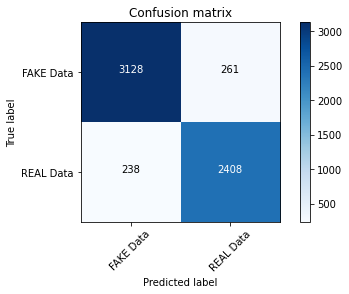

In [ ]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [ ]:
print('\n Classification Report is:\n',metrics.classification_report(y_test,pred))


 Classification Report is:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      3389
           1       0.90      0.91      0.91      2646

    accuracy                           0.92      6035
   macro avg       0.92      0.92      0.92      6035
weighted avg       0.92      0.92      0.92      6035



In [ ]:
print('\n The value of Precision is:\n',metrics.precision_score(y_test,pred))


 The value of Precision is:
 0.9022105657549644


In [ ]:
print('\n The value of Recall is:\n',metrics.recall_score(y_test,pred))


 The value of Recall is:
 0.91005291005291


### Multinomial Classifier with Hyperparameter

In [ ]:
classifier=MultinomialNB(alpha=0.1)

In [ ]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8662800331400166
Alpha: 0.1, Score : 0.8777133388566695
Alpha: 0.2, Score : 0.8801988400994201
Alpha: 0.30000000000000004, Score : 0.87986743993372
Alpha: 0.4, Score : 0.8808616404308203
Alpha: 0.5, Score : 0.8806959403479702
Alpha: 0.6000000000000001, Score : 0.8815244407622204
Alpha: 0.7000000000000001, Score : 0.8813587406793704
Alpha: 0.8, Score : 0.8816901408450705
Alpha: 0.9, Score : 0.8816901408450705


In [ ]:
#cv=Countvectorizer()
#cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X = cv.fit_transform(corpus).toarray()

In [ ]:
features_name=cv.get_feature_names()
cv.get_feature_names()

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'aclu',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'african american',
 'ag',
 'age',
 'age new',
 'age new york',
 'agenc',
 'agenda',
 'agenda breitbart',
 'agent',
 'aggress',
 '

In [ ]:
classifier.coef_[0]

array([-8.79747339, -8.50390794, -8.86748348, ..., -9.89972258,
       -8.39148017, -9.09223723])

In [ ]:
sorted(zip(classifier.coef_[0], features_name), reverse=True)[:20]

[(-4.9540335550698495, 'hillari'),
 (-4.985143813810478, 'trump'),
 (-5.09396777078389, 'clinton'),
 (-5.406224434792623, 'elect'),
 (-5.720704731812889, 'video'),
 (-5.773549474756074, 'comment'),
 (-5.796370993571742, 'war'),
 (-5.813919655860566, 'us'),
 (-5.886315118097155, 'fbi'),
 (-5.887681855526012, 'hillari clinton'),
 (-5.937650910283555, 'vote'),
 (-5.955192196052632, 'world'),
 (-6.040948488999476, 'email'),
 (-6.133757591036376, 'obama'),
 (-6.144495883768216, 'america'),
 (-6.164714961804142, 'russia'),
 (-6.228464630593834, 'day'),
 (-6.234273085996778, 'american'),
 (-6.288053898708686, 'break'),
 (-6.3129601417365455, 'presid')]

In [ ]:
#classifier.coef_[0]

In [ ]:
### Most fake
sorted(zip(classifier.coef_[0], features_name))[:5000]

[(-9.899722583188804, 'abe'),
 (-9.899722583188804, 'abroad'),
 (-9.899722583188804, 'abus new'),
 (-9.899722583188804, 'abus new york'),
 (-9.899722583188804, 'act new'),
 (-9.899722583188804, 'act new york'),
 (-9.899722583188804, 'advic'),
 (-9.899722583188804, 'advis new'),
 (-9.899722583188804, 'advis new york'),
 (-9.899722583188804, 'age new'),
 (-9.899722583188804, 'age new york'),
 (-9.899722583188804, 'agenda breitbart'),
 (-9.899722583188804, 'ail'),
 (-9.899722583188804, 'aleppo new'),
 (-9.899722583188804, 'aleppo new york'),
 (-9.899722583188804, 'ali'),
 (-9.899722583188804, 'america breitbart'),
 (-9.899722583188804, 'america new york'),
 (-9.899722583188804, 'american breitbart'),
 (-9.899722583188804, 'american new'),
 (-9.899722583188804, 'american new york'),
 (-9.899722583188804, 'ami'),
 (-9.899722583188804, 'ami schumer'),
 (-9.899722583188804, 'amp'),
 (-9.899722583188804, 'ann'),
 (-9.899722583188804, 'ann coulter'),
 (-9.899722583188804, 'applaud'),
 (-9.89972

## HashingVectorizer


In [ ]:
from sklearn.feature_extraction.text import  HashingVectorizer

In [ ]:
hs_vectorizer =HashingVectorizer(n_features=5000,alternate_sign=False)

In [ ]:
#hs_vectorizer = HashingVectorizer(n_features=5000,non_negative=True)
X=hs_vectorizer.fit_transform(corpus).toarray()

In [ ]:
X.shape

(18285, 5000)

In [ ]:
X

array([[0.        , 0.31622777, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

accuracy:   0.871
Confusion matrix, without normalization


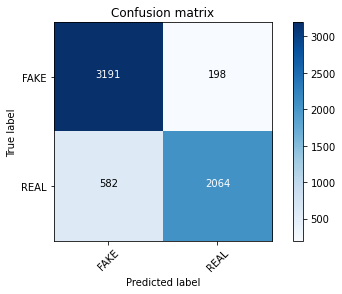

In [ ]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])